#Importing packages required

In [0]:
#importing packages required
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.preprocessing import LabelEncoder #Used to assign labels 
from sklearn.preprocessing import OrdinalEncoder #Used to convert into ordinal integers
from sklearn.feature_selection import SelectKBest #Will compute the chi2 statistic 
from sklearn.feature_selection import chi2 #Used for testing relationships between categorical variables
import itertools #To produce ate complex iterators
import numpy as np #To perform scientific computing
import matplotlib.pyplot as plt #Used for plotting graphs
from matplotlib.ticker import NullFormatter #Used for null values
import pandas as pd #To perform data manipulation
import matplotlib.ticker as ticker #To choose the format of ticks
from sklearn import preprocessing #Used for standardization of the dataset
%matplotlib inline
import scipy.spatial

#Collecting test data

In [0]:
#Collecting test data
dtest=pd.read_csv("testdata.csv")

In [6]:
#Getting the first five rows of the test data
dtest.head()

,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,...,Column59,Column60,Column61,Column62,Column63,Column64,Column65,Column66,Column67,Column68,Column69,Column70,Column71,Column72,Column73,Column74,Column75,Column76,Column77,Column78,Column79,Column80,Column81,Column82,Column83,Column84,Column85,Column86,Column87,Column88,Column89,Column90,Column91,Column92,Column93,Column94,Column95,Column96,Column97,Column98
0,1,0.425189,1.418599,2.668791,3.298629,2.264554,0.165179,-0.959727,0.282668,0.842850,0.683458,1.082088,0.722577,0.109811,-0.696609,-0.662268,-0.839985,-0.935297,-0.895362,-0.924266,-1.088177,-1.113585,-1.130681,-1.201895,-1.539509,-1.535227,-1.468417,-2.078012,-1.856547,-1.982869,-2.041212,-1.793860,-1.986162,-1.946903,-1.706593,-1.325142,-1.147066,-0.863629,-0.356015,-0.204890,...,0.463712,0.585878,0.622586,0.314033,0.421676,0.639392,0.470756,0.299982,0.247447,0.319957,0.299768,0.200925,0.152368,0.069307,0.290626,0.096217,0.379715,0.791631,0.606662,0.801544,0.696313,0.204389,0.205122,-0.045159,-0.184017,0.115775,-0.098132,-0.178360,-0.107120,-0.193491,-0.018196,-0.220493,-0.152557,-0.117011,-0.145160,-0.116668,-0.199262,-0.109837,-0.142488,0.098758
1,1,0.653929,2.177290,3.644783,2.279203,0.978367,-0.388296,-0.911911,-0.148330,0.305439,-0.230098,-0.451530,0.224113,-0.550054,-0.933977,-0.841629,-0.763727,-1.390977,-0.668909,-1.180268,-1.366029,-1.003644,-1.486201,-1.423197,-1.497927,-1.530533,-1.814270,-1.964060,-1.956103,-1.934264,-1.920925,-1.984635,-1.796928,-1.717051,-1.741488,-0.676497,-0.603892,-0.594680,0.071467,0.047549,...,0.688933,0.406544,0.319476,0.725306,0.298402,0.504723,0.395827,0.399075,0.554689,0.183927,0.461040,0.106824,0.631238,0.671494,-0.106819,0.392942,0.611029,0.494914,1.028177,0.812667,0.500167,0.476564,0.432609,0.491859,0.015041,-0.098010,0.027623,-0.117590,0.106466,-0.064095,0.099883,0.141395,-0.239092,0.247424,-0.085150,0.007800,0.407868,-0.194915,0.171107,0.197027
2,1,0.404953,0.553996,0.724097,1.449039,2.012616,1.624477,1.204726,1.117511,0.562099,-0.011556,-0.151060,-0.165723,-0.149703,-0.303985,-0.439550,-0.251222,-0.226462,-0.491236,-0.718471,-0.819033,-0.742902,-0.794862,-1.005411,-0.854667,-0.664719,-0.966059,-1.250551,-1.148753,-1.081805,-1.229859,-1.329428,-1.343500,-1.388611,-1.469790,-1.529446,-1.452891,-1.438498,-1.637808,-1.637643,...,0.361909,0.523365,0.312846,0.290468,0.497942,0.504409,0.418277,0.422805,0.391918,0.386068,0.468577,0.411592,0.260108,0.341633,0.550400,0.604816,0.494183,0.386066,0.502098,0.591109,0.476200,0.660107,0.928723,0.801658,0.780144,0.934836,0.981024,1.092867,1.151628,1.203222,1.297938,1.243332,1.463616,1.694916,1.456115,1.570372,1.934584,1.497556,0.812570,0.390639
3,1,1.088088,2.011949,2.301733,1.630199,0.636768,-0.140502,0.547954,1.075071,0.896861,1.137943,1.046725,0.390159,-0.463177,-0.516452,-0.748172,-0.870152,-0.839930,-0.972055,-1.087207,-1.066441,-1.278173,-1.391932,-1.527656,-1.722810,-1.801991,-2.109684,-2.231006,-2.357204,-2.432272,-2.444519,-2.442006,-2.176233,-1.942050,-1.663546,-1.124193,-0.796676,-0.546558,-0.140208,0.145777,...,0.573265,0.629044,0.670985,0.613061,0.524032,0.602005,0.547952,0.499085,0.473772,0.444688,0.515292,0.383676,0.405070,0.392573,0.385344,0.359873,0.533237,0.644077,0.760671,0.660656,0.434464,0.399898,0.319325,0.233626,0.142697,0.174776,0.134232,0.055882,0.141421,0.173346,0.125239,0.071349,0.138197,0.116399,0.131198,0.119412,0.082968,0.151348,0.273915,0.349405
4,-1,0.443621,0.947285,1.924084,2.159790,1.499447,0.964508,0.223256,-0.424946,0.121279,0.830197,0.727048,0.648830,0.787877,0.643346,0.467292,0.319482,-0.178127,-0.589164,-0.582264,-0.656677,-0.790563,-0.786609,-0.846742,-0.872577,-0.822020,-0.863381,-0.938879,-0.986204,-

#Collecting train data

In [0]:
#Collecting the traind data
dtrain=pd.read_csv("traindata.csv")

In [8]:
#Getting the first five rows of the train data
dtrain.head()

,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,...,Column59,Column60,Column61,Column62,Column63,Column64,Column65,Column66,Column67,Column68,Column69,Column70,Column71,Column72,Column73,Column74,Column75,Column76,Column77,Column78,Column79,Column80,Column81,Column82,Column83,Column84,Column85,Column86,Column87,Column88,Column89,Column90,Column91,Column92,Column93,Column94,Column95,Column96,Column97,Column98
0,-1,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,0.380282,-0.296780,-0.513929,-0.255645,-0.107203,-0.287827,-0.418009,-0.319163,-0.260379,-0.350357,-0.505486,-0.710887,-0.823920,-0.899702,-1.153950,-1.229831,-1.044091,-1.202031,-1.392195,-1.130108,-1.179867,-1.649272,-1.726575,-1.608370,-1.662802,-1.650672,-1.697309,-1.838697,-1.802596,-1.780536,...,0.683870,0.474995,0.532797,0.723550,0.664420,0.647936,0.757054,0.732072,0.620215,0.606297,0.677950,0.689084,0.598807,0.542647,0.581807,0.630631,0.664420,0.686318,0.657383,0.650889,0.721738,0.739706,0.691481,0.695229,0.750115,0.853845,0.916019,0.827750,0.880906,1.088831,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,1,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,-1.179593,-1.055926,-1.128777,-0.686039,-0.798789,-1.714279,-1.649858,-1.032699,-1.423918,-1.782433,-1.025126,-1.798909,-1.793614,-1.085478,-1.574390,-1.036059,-2.130021,-2.038621,-0.055013,-1.140195,-0.704275,0.048723,-0.475854,0.525865,0.244778,0.679932,0.928601,0.573041,1.231607,1.043324,...,0.631120,0.694075,0.515071,0.559229,0.555712,0.469694,0.388821,0.343129,0.535598,0.900708,0.656846,0.690033,0.952596,0.547770,-0.167693,0.011532,-0.176488,-0.277706,-0.224836,-0.910723,-0.037932,0.071668,-1.048920,-0.636218,-0.386637,-0.507512,-0.716656,-0.463758,-0.460442,-0.770792,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,-1,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,0.499957,-0.022363,-0.235318,-0.118273,-0.071027,-0.322986,-0.433562,-0.318660,-0.295655,-0.417733,-0.682480,-0.881840,-0.843320,-0.883652,-1.030018,-1.055265,-1.168637,-1.363991,-1.337611,-1.261294,-1.409782,-1.634504,-1.703238,-1.677025,-1.782628,-1.996872,-2.056372,-1.937881,-1.879412,-1.915427,...,0.675666,0.699885,0.732561,0.771665,0.738129,0.723699,0.806876,0.878984,0.855791,0.806384,0.792501,0.803814,0.781938,0.700439,0.735960,0.864162,0.707670,0.458756,0.600146,0.825136,0.800034,0.762821,0.755443,0.653766,0.526441,0.477339,0.574946,0.698425,0.722414,0.771598,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,-1,1.168874,2.075901,1.760140,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,0.989227,0.821253,0.576448,0.743089,0.852970,0.307458,-0.130391,-0.062200,-0.100727,-0.232818,-0.234465,-0.214756,-0.230413,-0.227551,-0.231002,-0.463479,-0.724215,-0.787885,-0.986687,-1.224672,-1.288142,-1.364148,-1.428221,-1.501767,-1.648084,-1.705836,-1.686790,-1.705719,-1.777683,-1.869313,...,0.405055,0.464974,0.434163,0.486807,0.439388,0.369611,0.413149,0.397895,0.318764,0.263717,0.288863,0.358244,0.326737,0.229215,0.204418,0.244386,0.262632,0.243885,0.227502,0.245785,0.232959,0.164611,0.171538,0.166690,0.099141,0.146937,0.133414,0.125294,0.202713,0.186409,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,1,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,0.701402,1.006133,0.395784,-0.369703,-0.738202,-0.729084,-0.906940,-0.870962,-1.060217,-1.197958,-0.981602,-1.272497,-1.287380,-1.276698,-1.539702,-1.346610,-1.535217,-1.763418,-1.688821,-1.809

#Scaling the unit variance

In [0]:
#Scaling the unit variance 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Preparing X_Train dataset

In [10]:
#Droping the target variable from train dataset and storing the independent variables in X_Train
scaler.fit(dtrain.drop('Column2',axis=1))
train_f = scaler.transform(dtrain.drop('Column2',axis=1))
X_Train= pd.DataFrame(train_f,columns=dtrain.columns[:-1])
X_Train.head()

,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,...,Column58,Column59,Column60,Column61,Column62,Column63,Column64,Column65,Column66,Column67,Column68,Column69,Column70,Column71,Column72,Column73,Column74,Column75,Column76,Column77,Column78,Column79,Column80,Column81,Column82,Column83,Column84,Column85,Column86,Column87,Column88,Column89,Column90,Column91,Column92,Column93,Column94,Column95,Column96,Column97
0,-0.349482,-0.953069,-1.264137,-0.638072,0.615717,1.585020,1.515399,1.300054,0.838954,0.230480,-0.498925,-0.586209,0.146608,0.937357,0.807697,0.736763,1.101256,1.481779,1.489032,1.326902,1.014038,0.932042,0.914535,0.514816,0.474201,1.026123,0.813375,0.340872,0.902744,0.657958,-0.167662,-0.338888,-0.296904,-0.491393,-0.651679,-0.882983,-1.240728,-1.411836,-1.558116,-1.745374,...,0.604079,-0.231666,0.101386,0.813827,0.610508,0.679101,1.300137,1.215311,0.759715,0.705037,0.993472,1.000111,0.834178,0.622042,0.716680,0.916004,0.851548,0.474482,0.188675,0.147039,0.395905,0.676975,0.714293,0.877416,1.107023,1.362650,1.599020,1.480052,1.623973,2.274330,1.843279,1.009694,0.959458,0.678445,0.222294,0.209011,0.384878,0.637480,0.861023,0.629058
1,-0.949627,-0.668763,-1.604575,-1.721992,-1.605352,-1.081781,-0.170376,-1.238330,-2.615990,-1.890414,-1.663838,-1.623974,-0.639384,-0.404853,-2.142936,-1.807948,-0.402557,-1.073970,-1.638673,0.104033,-1.402680,-1.183867,0.489107,-0.424786,0.906532,-1.337166,-1.137901,3.116213,0.883413,1.494333,2.388339,1.435582,2.330749,1.877372,2.122580,2.219654,1.615620,2.082650,1.630849,2.012890,...,0.389974,0.677821,0.023538,0.132826,0.155871,-0.124172,-0.361909,-0.450558,0.381713,1.874221,0.907605,1.003695,2.216293,0.641794,-1.988210,-1.284521,-1.981219,-2.599415,-2.441062,-4.138341,-1.752020,-1.353675,-4.167697,-2.687926,-1.788971,-1.920336,-2.263979,-1.534527,-1.517870,-2.437274,-1.801677,-1.330427,-0.064193,1.406122,2.637173,2.625553,1.625572,-0.371494,-2.347856,-0.930309
2,-0.663448,-1.276861,-1.601983,-0.972075,0.133240,1.040722,1.296784,1.464119,1.049186,0.393197,-0.077831,-0.115960,0.397479,1.007565,0.734969,0.704634,1.102317,1.404294,1.341882,0.910382,0.634317,0.889709,0.951289,0.791778,0.863680,0.755077,0.435618,0.454161,0.651335,0.253629,-0.145432,-0.305778,-0.381431,-0.640188,-1.063780,-1.307232,-1.358197,-1.500304,-1.710447,-1.767822,...,0.570780,0.701942,0.978678,1.013233,0.918777,1.020543,1.525012,1.844550,1.812083,1.499636,1.459543,1.433352,1.549600,1.230356,1.273005,1.746066,0.997245,-0.251123,0.018062,0.625208,0.617282,0.747238,0.893714,0.766385,0.537191,0.454686,0.792022,1.178187,1.252739,1.470578,1.428114,1.010442,0.769255,0.477580,0.249323,0.366562,0.510171,0.703678,1.030033,0.885593
3,0.779690,0.708042,-0.267857,-0.475656,0.418369,0.564125,0.161915,0.209315,0.632253,1.058436,1.216702,1.254170,1.970512,2.800831,2.039051,1.330915,1.642819,1.832459,1.745742,1.964697,2.116047,2.227098,2.453757,2.577423,2.184040,1.722264,1.779336,1.182510,0.721518,0.467545,0.261536,0.084404,-0.165654,-0.473116,-0.717343,-0.870555,-1.083236,-1.383143,-1.658371,-1.782025,...,-0.527595,-0.273265,-0.331783,-0.167317,-0.330621,-0.575213,-0.252105,-0.215994,-0.586930,-0.655433,-0.589601,-0.249193,-0.228693,-0.586282,-0.645291,-0.456865,-0.501955,-0.936264,-1.092722,-0.964650,-0.986091,-1.071154,-0.744196,-0.537904,-0.551400,-0.342098,-0.252666,-0.159588,0.035442,-0.012076,0.568925,1.272738,2.474668,3.152044,1.736624,1.166342,1.815707,1.470956,1.001436,1.352567
4,-0.101230,-0.725777,0.573218,1.215884,0.596391,-0.252149,-0.431880,0.512102,0.739908,0.667093,1.500400,0.949239,-0.061687,-0.287268,-0.105049,-0.273253,-0.061689,-0.275090,-0.362159,0.206457,-0.233413,-0.079246,0.051215,-0.347265,0.213650,-0.042705,-0.496

#Preparing X_Test dataset

In [11]:
##Droping the target variable from test dataset and storing the independent variables in X_Test
scaler.fit(dtest.drop('Column2',axis=1))
test_f = scaler.transform(dtest.drop('Column2',axis=1))
X_Test= pd.DataFrame(test_f,columns=dtest.columns[:-1])
X_Test.head()

,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,...,Column58,Column59,Column60,Column61,Column62,Column63,Column64,Column65,Column66,Column67,Column68,Column69,Column70,Column71,Column72,Column73,Column74,Column75,Column76,Column77,Column78,Column79,Column80,Column81,Column82,Column83,Column84,Column85,Column86,Column87,Column88,Column89,Column90,Column91,Column92,Column93,Column94,Column95,Column96,Column97
0,-0.495876,-0.002045,0.643213,1.104667,0.750299,-0.456838,-0.893998,0.093763,0.622075,0.646880,1.457668,1.366685,0.740887,-0.126787,0.151900,0.031457,0.003553,0.125530,0.096416,-0.120432,-0.078091,-0.005687,-0.034711,-0.457107,-0.370606,-0.219989,-1.005506,-0.658513,-0.815303,-0.855398,-0.550234,-0.801785,-0.812311,-0.698395,-0.381200,-0.362071,-0.213171,0.223560,0.168114,0.439349,...,0.005043,0.377906,0.501950,-0.477757,-0.075203,0.721367,0.087990,-0.421544,-0.694386,-0.455269,-0.400584,-0.824342,-0.886638,-1.301179,-0.357002,-1.029829,-0.174162,0.904916,0.079734,0.584925,0.454768,-0.941492,-0.731560,-1.250011,-1.315111,-0.448604,-0.750482,-0.856098,-0.795152,-0.953262,-0.463376,-0.864722,-0.740764,-0.664424,-0.707650,-0.629771,-0.736381,-0.568778,-0.544203,-0.200329
1,-0.174479,0.805306,1.493891,0.245617,-0.408273,-0.929622,-0.856560,-0.301994,0.040186,-0.367522,-0.441128,0.698164,-0.160462,-0.472886,-0.119857,0.154640,-0.884002,0.588286,-0.438600,-0.655280,0.121094,-0.556998,-0.359878,-0.395489,-0.363606,-0.738143,-0.837524,-0.807660,-0.744406,-0.692924,-0.808927,-0.566927,-0.540225,-0.741487,0.415672,0.283099,0.116340,0.742229,0.456162,0.925268,...,0.658375,-0.180743,-0.476587,0.935267,-0.523544,0.237204,-0.182994,-0.053460,0.560823,-0.993839,0.199682,-1.157746,0.831385,1.003649,-1.774383,0.003655,0.563153,0.000770,1.305639,0.615834,-0.155453,-0.054230,0.000076,0.343029,-0.795202,-0.999908,-0.451500,-0.718641,-0.277265,-0.618433,-0.164886,-0.053056,-0.909326,-0.150833,-0.634387,-0.480889,0.015758,-0.690021,-0.004880,0.038584
2,-0.524310,-0.922100,-1.051790,-0.453945,0.523358,0.789708,0.800709,0.860343,0.318088,-0.124856,-0.069111,0.175331,0.386400,0.445687,0.489348,0.982511,1.384196,0.951360,0.526506,0.397654,0.593495,0.515071,0.253990,0.557725,0.927663,0.532639,0.214292,0.401859,0.499026,0.240521,0.079545,-0.004179,-0.151435,-0.405969,-0.632191,-0.725322,-0.917490,-1.331654,-1.466740,-1.462964,...,-0.290270,0.183171,-0.497993,-0.558719,0.202169,0.236075,-0.101803,0.034687,-0.104162,-0.193525,0.227737,-0.077944,-0.500103,-0.258871,0.569410,0.741604,0.190706,-0.330909,-0.224371,0.000206,-0.230017,0.544100,1.595664,1.262035,1.203141,1.663577,1.815209,2.019350,2.256970,2.660908,2.863661,2.418437,2.407368,1.889095,1.247283,1.388181,1.907119,1.721863,1.098314,0.509297
3,0.435547,0.629360,0.323284,-0.301285,-0.715979,-0.717954,0.286474,0.821373,0.680555,1.151534,1.413886,0.920860,-0.041792,0.135895,0.021742,-0.017274,0.189306,-0.031192,-0.244114,-0.078590,-0.376285,-0.410813,-0.513362,-0.728731,-0.768456,-1.180730,-1.231041,-1.408564,-1.470823,-1.400159,-1.429131,-1.037682,-0.806566,-0.645237,-0.134330,0.054115,0.175298,0.485401,0.568246,0.556849,...,0.322841,0.512372,0.658198,0.549624,0.297057,0.586955,0.367176,0.318036,0.230244,0.038564,0.401612,-0.176852,0.019970,-0.063899,-0.019217,-0.111525,0.315191,0.455295,0.527644,0.193451,-0.359861,-0.304153,-0.364264,-0.423008,-0.461781,-0.296452,-0.198038,-0.326254,-0.192509,-0.004024,-0.100790,-0.210160,-0.174407,-0.335485,-0.370256,-0.347384,-0.386742,-0.196572,0.171930,0.409047
4,-0.469979,-0.503587,-0.005876,0.144990,0.061105,0.225956,0.032245,-0.555992,-0.159216,0.809817,1.018088,1.267778,1.667097,1.826964,1.863341,1.904394,1.478341,0.751243,0.811164,0.710181,0.507145,0.52787

#Storing the target variables

In [12]:
#Taking the target variable and storing it as Y_Test
Y_Test=dtest['Column2']
Y_Test.head()

0    1
1    1
2    1
3    1
4   -1
Name: Column2, dtype: int64

In [13]:
#Taking the target variable and storing it as Y_Train
Y_Train=dtrain['Column2']
Y_Train.head()

0   -1
1    1
2   -1
3   -1
4    1
Name: Column2, dtype: int64

#Building the KNN model with P values and K values

In [0]:
#Building a KNN classifier model with K and P values when k = 3 and p = 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski', n_neighbors=3,p=1)
knn.fit(X_Train,Y_Train)
predH = knn.predict(X_Test)

#Fetching the confusion matrix

In [22]:
#Printing the confusion matrix and the report
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_Test,predH))
print(classification_report(Y_Test,predH))

[[28  8]
 [ 3 61]]
              precision    recall  f1-score   support

          -1       0.90      0.78      0.84        36
           1       0.88      0.95      0.92        64

    accuracy                           0.89       100
   macro avg       0.89      0.87      0.88       100
weighted avg       0.89      0.89      0.89       100



In [0]:
#When K = 3, p =2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=3,p=2)
knn.fit(X_Train,Y_Train)
pred = knn.predict(X_Test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_Test,pred))
print(classification_report(Y_Test,pred))

[[27  9]
 [ 3 61]]
              precision    recall  f1-score   support

          -1       0.90      0.75      0.82        36
           1       0.87      0.95      0.91        64

    accuracy                           0.88       100
   macro avg       0.89      0.85      0.86       100
weighted avg       0.88      0.88      0.88       100



In [0]:
#When k = 3 and P = 4
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=3,p=4)
knn.fit(X_Train,Y_Train)
pred = knn.predict(X_Test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_Test,pred))
print(classification_report(Y_Test,pred))

[[26 10]
 [ 5 59]]
              precision    recall  f1-score   support

          -1       0.84      0.72      0.78        36
           1       0.86      0.92      0.89        64

    accuracy                           0.85       100
   macro avg       0.85      0.82      0.83       100
weighted avg       0.85      0.85      0.85       100



In [23]:
#When k = 5 and P = 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=5,p=1)
knn.fit(X_Train,Y_Train)
pred = knn.predict(X_Test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_Test,pred))
print(classification_report(Y_Test,pred))

[[26 10]
 [ 3 61]]
              precision    recall  f1-score   support

          -1       0.90      0.72      0.80        36
           1       0.86      0.95      0.90        64

    accuracy                           0.87       100
   macro avg       0.88      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



In [24]:
#When k = 5 and P = 2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=5,p=2)
knn.fit(X_Train,Y_Train)
pred = knn.predict(X_Test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_Test,pred))
print(classification_report(Y_Test,pred))

[[25 11]
 [ 3 61]]
              precision    recall  f1-score   support

          -1       0.89      0.69      0.78        36
           1       0.85      0.95      0.90        64

    accuracy                           0.86       100
   macro avg       0.87      0.82      0.84       100
weighted avg       0.86      0.86      0.86       100



In [26]:
#When k = 5 and P = 4
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=5,p=4)
knn.fit(X_Train,Y_Train)
pred = knn.predict(X_Test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_Test,pred))
print(classification_report(Y_Test,pred))

[[23 13]
 [ 4 60]]
              precision    recall  f1-score   support

          -1       0.85      0.64      0.73        36
           1       0.82      0.94      0.88        64

    accuracy                           0.83       100
   macro avg       0.84      0.79      0.80       100
weighted avg       0.83      0.83      0.82       100



In [25]:
#When k = 11  and P = 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=11,p=1)
knn.fit(X_Train,Y_Train)
pred = knn.predict(X_Test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_Test,pred))
print(classification_report(Y_Test,pred))

[[21 15]
 [ 5 59]]
              precision    recall  f1-score   support

          -1       0.81      0.58      0.68        36
           1       0.80      0.92      0.86        64

    accuracy                           0.80       100
   macro avg       0.80      0.75      0.77       100
weighted avg       0.80      0.80      0.79       100



In [35]:
#When k = 11  and P = 2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=11,p=2)
knn.fit(X_Train,Y_Train)
pred = knn.predict(X_Test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_Test,pred))
print(classification_report(Y_Test,pred))

[[21 15]
 [ 5 59]]
              precision    recall  f1-score   support

          -1       0.81      0.58      0.68        36
           1       0.80      0.92      0.86        64

    accuracy                           0.80       100
   macro avg       0.80      0.75      0.77       100
weighted avg       0.80      0.80      0.79       100



In [36]:
#When k = 11  and P = 4
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=11,p=4)
knn.fit(X_Train,Y_Train)
pred = knn.predict(X_Test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_Test,pred))
print(classification_report(Y_Test,pred))

[[22 14]
 [ 5 59]]
              precision    recall  f1-score   support

          -1       0.81      0.61      0.70        36
           1       0.81      0.92      0.86        64

    accuracy                           0.81       100
   macro avg       0.81      0.77      0.78       100
weighted avg       0.81      0.81      0.80       100



#Error for P value less than 1

In [0]:
#When k = 11  and P = 0.5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=11,p=0.5)
knn.fit(X_Train,Y_Train)
pred = knn.predict(X_Test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_Test,pred))
print(classification_report(Y_Test,pred))

#Visualizing the K-Value

Text(0.5, 1.0, 'K Value with respect to error rate')

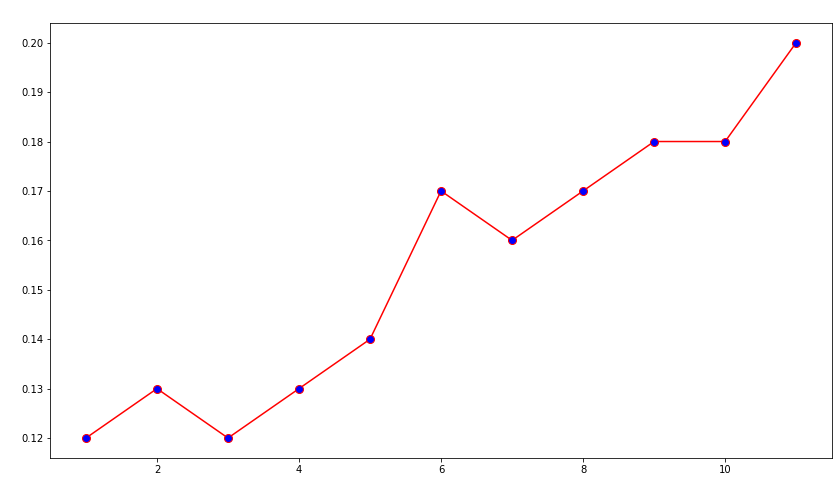

In [16]:
#Calculating optimum K value with respect to error rate and visualizing it
error_rate = []
for i in range(1,12):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_Train,Y_Train)
    prediction = knn.predict(X_Test)
    error_rate.append(np.mean(prediction != Y_Test))
plt.figure(figsize=(14,8))
plt.plot(range(1,12),error_rate,color='red', linestyle='solid', marker='o',
         markerfacecolor='Blue', markersize=8)
plt.ylabel('Error value', color="white")
plt.xlabel('K Value', color="white")
plt.title('K Value with respect to error rate', color="white")